# 각 지역 '감염 케이스'별 확진자 수 탐색  
---  

### 개요  
- 각 지역의 감염 케이스별 확진자 수를 파악하기 위한 탐색
- 어떠한 케이스로 인해 많이 감염되었는지를 확인 

### 목차  
1. 데이터 로드
2. 각 지역 '감염 케이스'별 확진자 수
3. 서울, 경기, 대구 ,경북 지역 '감염 케이스'별 확진자 수

###     시각화  

- 모든 지역의 감염 케이스_BoxPlot
- Top 4 지역의 감염 케이스_BoxPlot

### 인사이트 도출

- 대구, 경북에 특정 감염 케이스로 인해 감염된 환자가 유독 많다는것을 발견. 
- 대구의 이상치로 인해 모든 그래프가 영향을 받아 따로 Top 4 지역들만 다시 시각화함.
- 이 TOP 케이스는 '신천지로 인한 감염'이었음.

---
## 1. 데이터 로드

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pprint import pprint as pp

In [2]:
df_Case = pd.read_csv('/home/seong/workspace/covid/Data/Case.csv')
df_Case.head()

,case_id,province,city,group,infection_case,confirmed,latitude,longitude
0,1000001,Seoul,Yongsan-gu,True,Itaewon Clubs,139,37.538621,126.992652
1,1000002,Seoul,Gwanak-gu,True,Richway,119,37.48208,126.901384
2,1000003,Seoul,Guro-gu,True,Guro-gu Call Center,95,37.508163,126.884387
3,1000004,Seoul,Yangcheon-gu,True,Yangcheon Table Tennis Club,43,37.546061,126.874209
4,1000005,Seoul,Dobong-gu,True,Day Care Center,43,37.679422,127.044374


---
## 2. 각 지역 '감염 케이스'별 확진자 수(6월 30일 기준)
 - 전지역 6월 30일 기준, 감염케이스별 확진자 수
 - 각 지역의 영향력이 있는 '감염 케이스' 확인

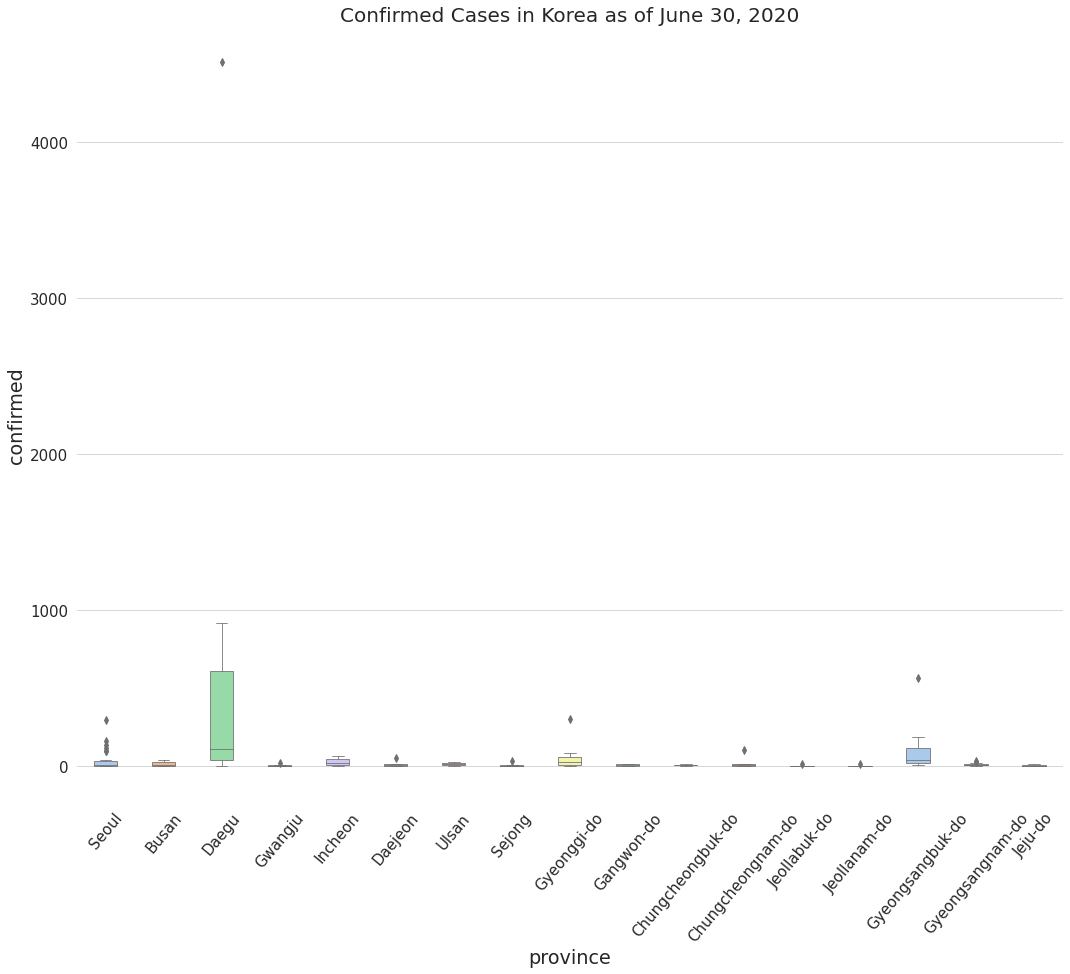

In [3]:
# 지역별 확진자 수 (boxplot)

sns.set(style='whitegrid', font='sans-serif')
sns.set_context("paper", font_scale=2)

color = sns.color_palette("pastel", 14)


frame = plt.figure(figsize = ( 15 , 12 ) ) # Two column paper. Each column is about 3.15 inch wide.
plt.xticks(rotation =50)
plt.tight_layout()  

# splot.yaxis.grid(True, clip_on=False)                                                 
sns.despine(left=True, bottom=True)  

grid = sns.boxplot(x = 'province' , y = 'confirmed' ,data = df_Case, palette= color, width=0.4, linewidth = 0.8)
# grid = sns.stripplot(x='province', y='confirmed', data=df_case, color="orange", jitter=0.2, size=2.5)

grid.set_title("Confirmed Cases in Korea as of June 30, 2020", fontsize=20)
grid.tick_params(axis='y', labelsize=15, which = 'both', direction = 'out')
grid.tick_params(axis='x', labelsize=15)
# plt.savefig('2020년6월30일기준_전체_감염케이스별_확진자수_박스그래프', bbox_inches='tight') # 그림파일로 그래프를 저장함

---
## 3. 서울, 경기, 대구 ,경북 지역 '감염 케이스'별 확진자 수(6월 30일 기준)
 - 이전 그래프에서 확인한 Top 4 지역인 서울, 경기, 대구, 경북 지역만 따로 확인
 - 모든 그래프에 영향을 주는 대구의 이상치를 확인

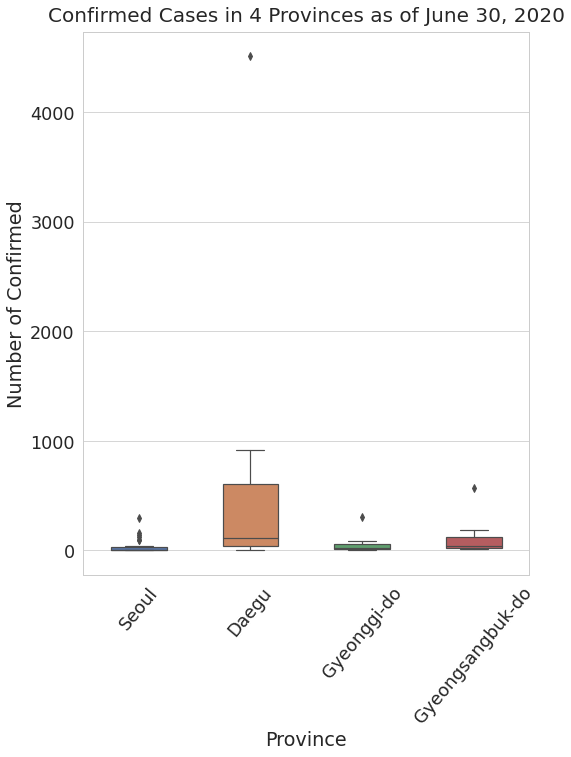

In [4]:
case_sgdg = df_Case[df_Case.province.isin(['Seoul', 'Gyeonggi-do' , 'Daegu' , 'Gyeongsangbuk-do'])]

# 서울, 경기, 대구. 경북 지역의 케이스별 확진자수 Boxplot (6/30 기준)

frame = plt.figure(figsize = ( 8 , 10 ) )
grid = plt.xticks (rotation = 50)
grid = sns.boxplot(x = 'province' , y = 'confirmed' , 
                   width=0.5, data = case_sgdg, 
                   palette = sns.color_palette("deep"))

grid.set_title('Confirmed Cases in 4 Provinces as of June 30, 2020', fontsize = 20, pad = 10)
grid.set_xlabel('Province')
grid.set_ylabel('Number of Confirmed')

plt.show()
# plt.savefig('2020년6월30일기준_지역_감염케이스별_확진자수_박스그래프', bbox_inches='tight') # 그림파일로 그래프를 저장함